# IMB Allgatherv performance comparison

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
from matplotlib import pyplot as plt
%matplotlib inline
mpl.rcParams['figure.figsize'] = (12,4)
import seaborn as sns
sns.set_style("white", {"font.family": "serif"})

In [2]:
import sys
sys.path.append('../../../python-modules')

In [3]:
from utilities import filemanip

In [4]:
from synthanalysis import imb

In [5]:
benchmark = "Allgatherv"
systems = ['ARCHER_CrayMPICH774',
           'ARCHER2_CrayMPICH8015',
           'Cirrus_IMPI18',
           'Cirrus_MPT218',
           'Fulhame_OMPI4',
           'Fulhame_MVAPICH231',
           'Fulhame_HMPT220',
           'Isambard_CrayMPICH776',
           'Tesseract_IMPI181',
           'Peta4-Skylake_IMPI193',
           'Athena_IMPI182']
nodelist = [1, 2, 4, 8, 16, 32]
imb_perf = []
for system in systems:
    tdict = {}
    for nodes in nodelist:
        stem = 'IMB_{0}_{1}nodes'.format(benchmark, nodes)
        imbfiles = filemanip.get_filelist('../results/' + system, stem)
        if len(imbfiles) > 0:
            tlist = imb.get_perf_dict(imbfiles[0], nodes, system)
            imb_perf.extend(tlist)
imb_df = pd.DataFrame(imb_perf)
imb.get_perf_stats(imb_df)

                                                    Perf             \
                                                     min     median   
System                Nodes Processes Size                            
ARCHER2_CrayMPICH8015 1     128       0             0.28       0.28   
                                      1            10.66      10.66   
                                      2            11.19      11.19   
                                      4            16.40      16.40   
                                      8            17.16      17.16   
...                                                  ...        ...   
Tesseract_IMPI181     32    768       65536     31211.47   31211.47   
                                      131072    57875.48   57875.48   
                                      262144   117349.64  117349.64   
                                      524288   227364.84  227364.84   
                                      1048576  454212.89  454212.89   

     

/home/jovyan/work/synth/IMB/analysis/../../../python-modules/synthanalysis/imb.py:41: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df_num = df.drop(['File', 'Date'], 1)


/home/jovyan/work/synth/IMB/analysis/../../../python-modules/synthanalysis/imb.py:47: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df_num = df.drop(['File', 'Date'], 1)


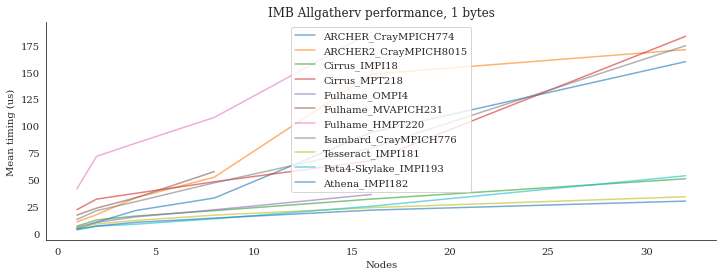

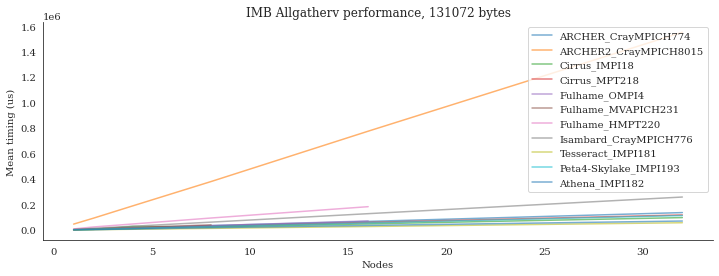

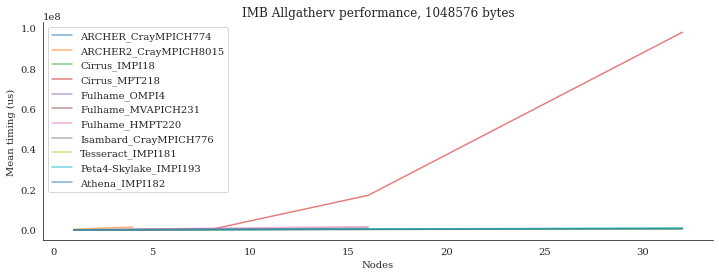

In [6]:
sizelist = [1, 131072, 1048576]
# Plot performance
for size in sizelist:
    plt.clf()
    for system in systems:
        nodes, perf = imb.get_node_scaling_df(imb_df, system, size, 'max')
        plt.plot(nodes, perf, label=f'{system}', alpha=0.6)
    sns.despine()
    plt.xlabel("Nodes")
    plt.ylabel("Mean timing (us)")
    plt.title(f'IMB {benchmark} performance, {size} bytes')
    plt.legend(loc='best')
    plt.show()


/home/jovyan/work/synth/IMB/analysis/../../../python-modules/synthanalysis/imb.py:61: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df_num = df.drop(['File', 'Date'], 1)


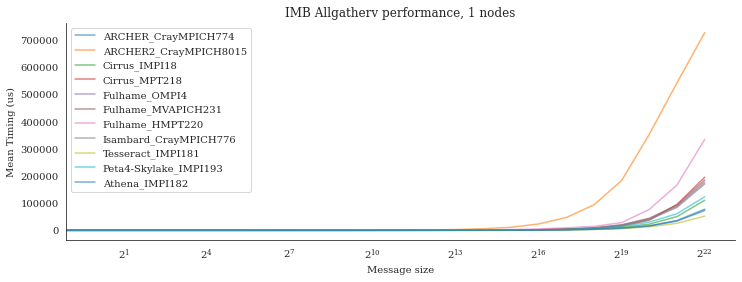

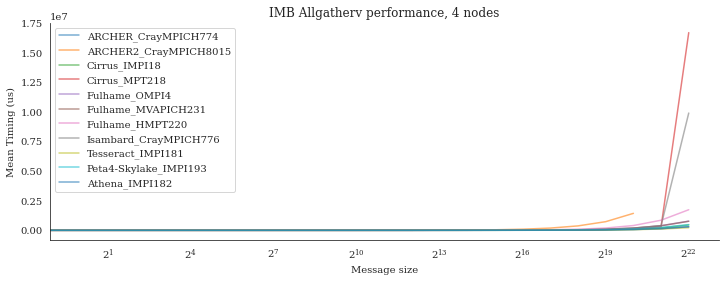

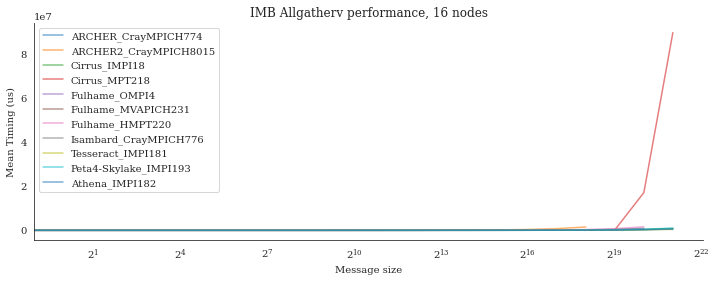

In [7]:
nodelist = [1, 4, 16]
# Plot performance
for node in nodelist:
    plt.clf()
    for system in systems:
        sizes, perf = imb.get_size_scaling_df(imb_df, system, node, 'max')
        plt.plot(sizes, perf, label=f'{system}', alpha=0.6)
    sns.despine()
    plt.xscale('log', base=2)
    plt.xlabel("Message size")
    plt.ylabel("Mean Timing (us)")
    plt.title(f'IMB {benchmark} performance, {node} nodes')
    plt.legend(loc='best')
    plt.show()

In [8]:
# Compute performance ratio
imb.get_perf_ratio(imb_df, 'ARCHER_CrayMPICH774', systems, 'max', invert=True)

ARCHER_CrayMPICH774 performance ratio to ARCHER_CrayMPICH774 performance
            #nodes
      #bytes         1         2         4         8        16        32
           0     1.000     1.000     1.000     1.000     1.000     1.000
           1     1.000     1.000     1.000     1.000     1.000     1.000
           2     1.000     1.000     1.000     1.000     1.000     1.000
           4     1.000     1.000     1.000     1.000     1.000     1.000
           8     1.000     1.000     1.000     1.000     1.000     1.000
          16     1.000     1.000     1.000     1.000     1.000     1.000
          32     1.000     1.000     1.000     1.000     1.000     1.000
          64     1.000     1.000     1.000     1.000     1.000     1.000
         128     1.000     1.000     1.000     1.000     1.000     1.000
         256     1.000     1.000     1.000     1.000     1.000     1.000
         512     1.000     1.000     1.000     1.000     1.000     1.000
        1024     1.000     1.000

        4096     0.199     0.155     0.597     0.718     0.999
        8192     0.232     0.255     1.014     1.826     2.274
       16384     0.186     0.198     0.883     1.773     2.039
       32768     0.217     0.197     0.867     1.504     1.710
       65536     0.217     0.307     0.748     1.273     1.469
      131072     0.428     0.441     0.586     1.005     0.951
      262144     0.475     0.453     0.520     0.697     0.736
      524288     0.430     0.391     0.393     0.480     0.494
     1048576     0.386     0.363     0.367     0.436     0.418
     2097152     0.411     0.365     0.363     0.373
     4194304     0.439     0.396     0.394
Fulhame_MVAPICH231 performance ratio to ARCHER_CrayMPICH774 performance
            #nodes
      #bytes         1         2         4         8        16        32
           0     0.333     0.339     0.296     0.250
           1     0.249     0.438     0.642     0.571
           2     0.206     0.476     0.702     0.650
           4  

       32768     0.389     0.431     1.607     2.659     2.932     3.236
       65536     0.346     0.474     1.067     1.809     2.033     1.852
      131072     0.508     0.555     0.749     1.260     1.201     1.206
      262144     0.541     0.538     0.623     0.838     0.861     0.882
      524288     0.505     0.509     0.527     0.650     0.665     0.704
     1048576     0.544     0.536     0.544     0.635     0.657     0.688
     2097152     0.591     0.576     0.586     0.643     0.628
     4194304     0.629     0.620     0.630     0.641
Athena_IMPI182 performance ratio to ARCHER_CrayMPICH774 performance
            #nodes
      #bytes         1         2         4         8        16        32
           0     1.091     1.000     1.036     1.023     1.039     1.035
           1     1.088     1.521     2.081     2.323     4.357     5.333
           2     1.125     1.538     2.096     2.401     4.537     5.467
           4     1.113     1.433     2.258     3.104     5.508     